In [1]:
import datetime

import pymc
import numpy as np
import spacepy.plot as spp # for the style
import matplotlib.pyplot as plt
import spacepy.toolbox as tb
import spacepy.plot as spp
%matplotlib inline

datetime.datetime.now()

This unreleased version of SpacePy is not supported by the SpacePy team.


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


datetime.datetime(2016, 6, 27, 13, 27, 51, 472902)

From https://stackoverflow.com/questions/17409324/solving-inverse-problems-with-pymc

Suppose we're given a prior on **X** (e.g. X ~ Gaussian) and a forward operator **y = f(x)**. Suppose further we have observed **y** by means of an experiment and that this experiment can be repeated indefinitely. The output **Y** is assumed to be Gaussian (Y ~ Gaussian) or noise-free (Y ~ Delta(observation)).

How to consistently update our subjective degree of knowledge about **X** given the observations? I've tried the following model with PyMC, but it seems I'm missing something:

    from pymc import *

    xtrue = 2                        # this value is unknown in the real application
    x = rnormal(0, 0.01, size=10000) # initial guess
    
    for i in range(5):
        X = Normal('X', x.mean(), 1./x.var())
        Y = X*X                        # f(x) = x*x
        OBS = Normal('OBS', Y, 0.1, value=xtrue*xtrue+rnormal(0,1), observed=True)
        model = Model([X,Y,OBS])
        mcmc = MCMC(model)
        mcmc.sample(10000)
        
        x = mcmc.trace('X')[:]       # posterior samples

The posterior is not converging to **xtrue**.

In [3]:

xtrue = 2                        # this value is unknown in the real application
x = pymc.rnormal(0, 0.01, size=10000) # initial guess

for i in range(5):
    X = pymc.Normal('X', x.mean(), 1./x.var())
    Y = X*X                        # f(x) = x*x
    OBS = pymc.Normal('OBS', Y, 0.1, value=xtrue*xtrue+pymc.rnormal(0,1), observed=True)
    model = pymc.Model([X,Y,OBS])
    mcmc = pymc.MCMC(model)
    mcmc.sample(10000)

    x = mcmc.trace('X')[:]       # posterior samples

 [-----------------100%-----------------] 10000 of 10000 complete in 0.7 sec

Plotting X


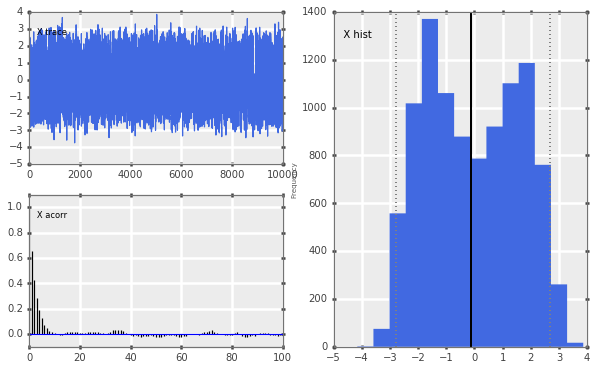

In [4]:
pymc.Matplot.plot(mcmc)

There is a clear issue here that $y=x^2$ loses the negative when applied so that the result is peaks at both -2 and 2. 

1. Try doing this again with better constraints on the model (x>=0)

 [-----------------100%-----------------] 10000 of 10000 complete in 0.7 secPlotting X


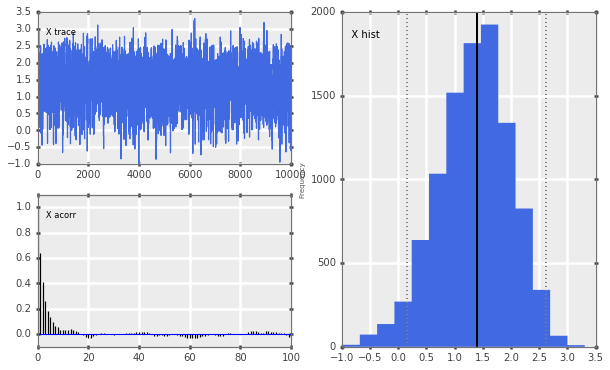

In [10]:

xtrue = 2                        # this value is unknown in the real application
x = pymc.rpoisson(1, size=10000) # initial guess

for i in range(5):
    X = pymc.Normal('X', x.mean(), 1./x.var())
    Y = X*X                        # f(x) = x*x
    OBS = pymc.Normal('OBS', Y, 0.1, value=xtrue*xtrue+pymc.rnormal(0,1), observed=True)
    model = pymc.Model([X,Y,OBS])
    mcmc = pymc.MCMC(model)
    mcmc.sample(10000)

    x = mcmc.trace('X')[:]       # posterior samples
pymc.Matplot.plot(mcmc)